Objective
Flight Delays and Cancellations Explorration
Import libraries

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 129.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 163.8 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 150.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 168.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source

In [18]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\DELL\Downloads\flights.csv'

# Read the file into a pandas DataFrame
df= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6780\4273635341.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file_path)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.shape

(5819079, 31)

In [22]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [24]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
Question: Which airline had the highest percentage of delayed or cancelled flights in 2015?

In [25]:
# Group by airline and calculate the percentage of delayed or cancelled flights
delayed_cancelled_percentage = df.groupby('AIRLINE')[['ARRIVAL_DELAY', 'CANCELLED']].apply(lambda x: (x['ARRIVAL_DELAY'].notna() | x['CANCELLED']).mean() * 100)

# Find the airline with the highest percentage
airline_highest_percentage = delayed_cancelled_percentage.idxmax()
highest_percentage = delayed_cancelled_percentage.max()

print(f"The airline with the highest percentage of delayed or cancelled flights is {airline_highest_percentage} with {highest_percentage:.2f}%")


The airline with the highest percentage of delayed or cancelled flights is HA with 99.92%


In [ ]:
Question 2: Which airports had the most flight cancellations?

In [26]:
# Group by destination airport and sum the number of cancellations
cancellations_by_airport = df.groupby('DESTINATION_AIRPORT')['CANCELLED'].sum()

# Find the airport(s) with the most cancellations
most_cancellations_airports = cancellations_by_airport[cancellations_by_airport == cancellations_by_airport.max()]

print("Airport(s) with the most flight cancellations:")
print(most_cancellations_airports)


Airport(s) with the most flight cancellations:
DESTINATION_AIRPORT
ORD    9273
Name: CANCELLED, dtype: int64


In [ ]:
Question4: Are there any geographical patterns in flight delays? Do certain regions or airports experience more delays than others?

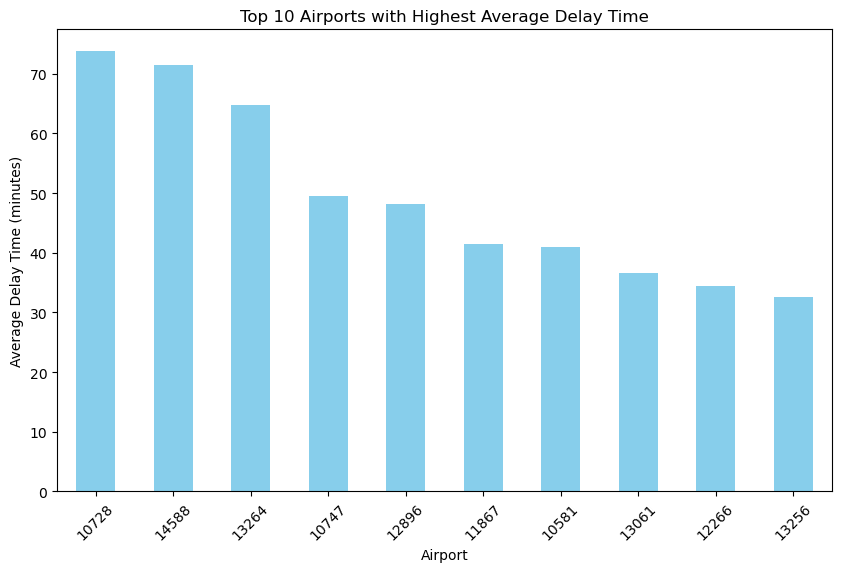

In [27]:
# Group data by airport and calculate average delay time
airport_avg_delay = df.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)

# Plot top 10 airports with the highest average delay time
top_airports = airport_avg_delay.head(10)
top_airports.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Airports with Highest Average Delay Time')
plt.xlabel('Airport')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Question:What was the average flight delay for each day of the week? Are weekends or weekdays more prone to delays?

In [29]:
# Assuming you have a column named 'DATE' containing date information
df['DAY'] = pd.to_datetime(df['DAY'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['DAY_OF_WEEK'] = df['DAY'].dt.dayofweek

# Calculate average flight delay for each day of the week
avg_delay_by_day = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

# Determine if each day is a weekday or weekend (0=Monday, 1=Tuesday, ..., 4=Friday)
def is_weekend(day):
    return day >= 5

df['WEEKEND'] = df['DAY_OF_WEEK'].apply(is_weekend)

# Calculate average flight delay for weekdays and weekends
avg_delay_weekday = avg_delay_by_day[~df['WEEKEND']]
avg_delay_weekend = avg_delay_by_day[df['WEEKEND']]

print("Average Flight Delay for Each Day of the Week:")
print(avg_delay_by_day)

print("\nAverage Flight Delay (Weekdays vs. Weekends):")
print("Weekdays:", avg_delay_weekday.mean())
print("Weekends:", avg_delay_weekend.mean())


Average Flight Delay for Each Day of the Week:
DAY_OF_WEEK
3    4.407057
Name: ARRIVAL_DELAY, dtype: float64

Average Flight Delay (Weekdays vs. Weekends):
Weekdays: 4.407057357987598
Weekends: nan
